In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Replace 'your_file.csv' with the path to your uploaded CSV file
df = pd.read_csv('/content/drive/MyDrive/GoogleColab/web social media anlysis and visualization/New_year_resolutions_data.csv', encoding='ISO-8859-1')
print(df.head())  # Display the first few entries to check the data


                                   resolution_topics  gender             name  \
0                                      Eat healthier  female      Dena_Marina   
1  Humor about Personal Growth and Interests Reso...  female     ninjagirl325   
2                                  Be More Confident    male     RickyDelReyy   
3                                              Other    male        CalmareNJ   
4                                   Be more positive  female  welovatoyoudemi   

  Resolution_Category  retweet_count  \
0    Health & Fitness            0.0   
1               Humor            1.0   
2     Personal Growth            0.0   
3       Philanthropic            0.0   
4     Personal Growth            0.0   

                                                text   tweet_created  \
0  #NewYearsResolution :: Read more books, No scr...  12/31/14 10:48   
1  #NewYearsResolution Finally master @ZJ10 's pa...  12/31/14 10:47   
2  #NewYearsResolution to stop being so damn perf...  12

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove all non-ASCII characters
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)  # Regex to remove non-ASCII characters

    # Remove emails
    text = re.sub(r'\b[\w.-]+?@\w+?\.\w+?\b', ' ', text)

    # Remove URLs
    text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', text)

    # Remove numbers
    text = re.sub(r'\b\d+\b', ' ', text)

    # Remove punctuation and extra spaces
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenization
    tokens = word_tokenize(text)

    # Lemmatize and remove stopwords
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 1]

    return ' '.join(cleaned_tokens)


# Apply cleaning function to the text column
# Replace 'text_column_name' with the actual name of your text column
df['cleaned_text'] = df['text'].apply(clean_text)
print(df['cleaned_text'].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


0    newyearsresolution read book scrolling fb chec...
1    newyearsresolution finally master zj10 part ki...
2                    newyearsresolution stop damn perf
3    newyearsresolution help disabled patient disco...
4    newyearsresolution 2015goals 2015bucketlist co...
Name: cleaned_text, dtype: object


In [ ]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

# Get sentiment scores
df['sentiments'] = df['cleaned_text'].apply(lambda text: sia.polarity_scores(text))
df['compound'] = df['sentiments'].apply(lambda d: d['compound'])
df['sentiment_type']=''
df.loc[df.compound>0,'sentiment_type']='POSITIVE'
df.loc[df.compound==0,'sentiment_type']='NEUTRAL'
df.loc[df.compound<0,'sentiment_type']='NEGATIVE'

print(df[['cleaned_text', 'compound', 'sentiment_type']].head())


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                        cleaned_text  compound sentiment_type
0  newyearsresolution read book scrolling fb chec...    0.4588       POSITIVE
1  newyearsresolution finally master zj10 part ki...    0.0000        NEUTRAL
2                  newyearsresolution stop damn perf   -0.5994       NEGATIVE
3  newyearsresolution help disabled patient disco...    0.8020       POSITIVE
4  newyearsresolution 2015goals 2015bucketlist co...    0.0000        NEUTRAL


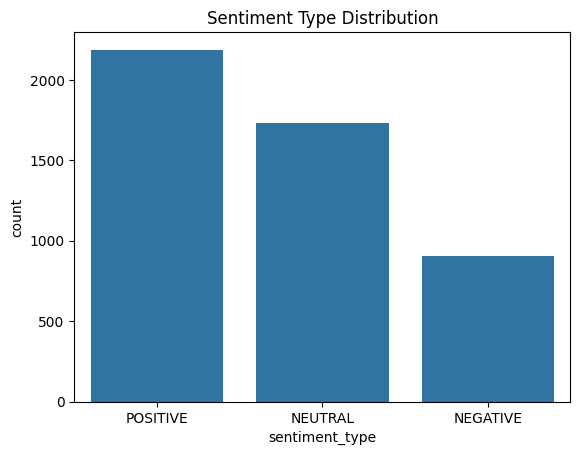

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sentiment_type', data=df)
plt.title('Sentiment Type Distribution')
plt.show()


In [ ]:
# Assuming 'df' is your original DataFrame

# Filter positive and negative sentiments
positive_df = df[df['sentiment_type'] == 'POSITIVE']
negative_df = df[df['sentiment_type'] == 'NEGATIVE']

# Balance the dataset
min_count = min(len(positive_df), len(negative_df))
balanced_positive = positive_df.sample(n=min_count, random_state=42)
balanced_negative = negative_df.sample(n=min_count, random_state=42)

# Concatenate the balanced data
balanced_df = pd.concat([balanced_positive, balanced_negative])


In [ ]:
# Shuffle the dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)
print(balanced_df.head())


                                   resolution_topics  gender             name  \
0                                     Try new things  female  EndlessSummer17   
1                                   Be more positive    male       tyarnold18   
2  Humor about Family/Friends/Relationships Resol...    male        dinfontay   
3                                 Take more vacation    male     perrycorneau   
4  Humor about Time Management/Organization Resol...    male          MPasset   

    Resolution_Category  retweet_count  \
0       Personal Growth            NaN   
1       Personal Growth            NaN   
2                 Humor            0.0   
3  Recreation & Leisure            NaN   
4                 Humor            0.0   

                                                text     tweet_created  \
0  #NewYearsResolution _Áü to be more open min...    12/30/14 22:18   
1  Be the best possible version of yourself and n...     12/28/14 7:14   
2  #NewYearsResolution: stop trying. -

In [ ]:
# Save to a new CSV file
balanced_df.to_csv('/content/drive/MyDrive/GoogleColab/web social media anlysis and visualization/new_balanced_sentiment_dataset.csv', index=False)




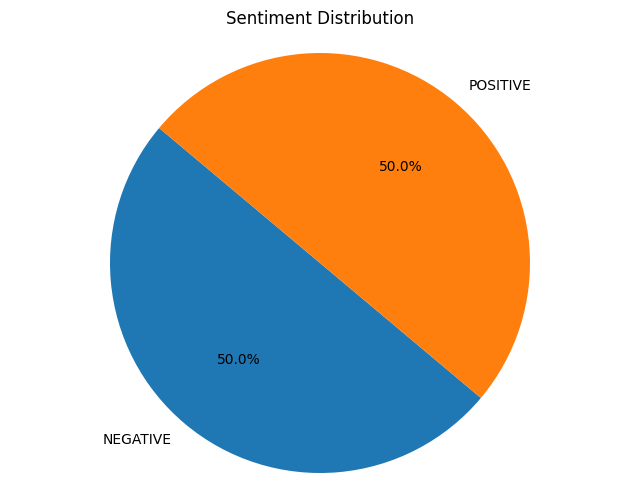

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your CSV dataset into a DataFrame
df = pd.read_csv("/content/drive/MyDrive/GoogleColab/web social media anlysis and visualization/new_balanced_sentiment_dataset.csv")

# Assuming your dataset has a column named 'sentiment' that contains binary values (0 or 1) indicating negatives and positives
sentiment_counts = df['sentiment_type'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
